In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

In [12]:
# Read the flights.csv file into a DataFrame called flights
flights = pd.read_csv('flightsdata.csv')

In [13]:
flights.head()

,flight_id,airline_name,origin_airport,year,month,day_of_month,time_in_air,time_on_flight,departure_delay,arrival_delay,arrival_delay_caused_by_carrier,arrival_delay_caused_by_others,arrival_delay_category_carrier,arrival_delay_category_weather,arrival_delay_category_nas,arrival_delay_category_security,arrival_delay_category_aircraft
0,6543764,Southwest Airlines Co.,Bob Hope Airport,2021,1,1,45.0,64.0,11,10,0,0,0,0,0,0,0
1,6544163,Southwest Airlines Co.,Bob Hope Airport,2021,1,1,66.0,79.0,7,6,0,0,0,0,0,0,0
2,6544164,Southwest Airlines Co.,Bob Hope Airport,2021,1,1,46.0,60.0,12,7,0,0,0,0,0,0,0
3,6544561,Southwest Airlines Co.,Bob Hope Airport,2021,1,1,48.0,61.0,9,0,0,0,0,0,0,0,0
4,6545161,Southwest Airlines Co.,Bob Hope Airport,2021,1,1,46.0,59.0,82,76,76,0,3,0,0,0,73


In [14]:
flights.shape

(568356, 17)

In [15]:
# Check all values from Airline column
flights['airline_name'].unique()

array(['Southwest Airlines Co.', 'Northwest Airlines Inc.',
       'Delta Air Lines Inc.', 'Aloha Airlines Inc.', 'PSA Airlines Inc.',
       'Alaska Airlines Inc.', 'SkyWest Airlines Inc.',
       'ExpressJet Airlines Inc. (1)', 'Mesa Airlines Inc.',
       'ExpressJet Airlines Inc.', 'JetBlue Airways',
       'Frontier Airlines Inc.', 'AirTran Airways Corporation',
       'Endeavor Air Inc.', 'United Air Lines Inc.', 'US Airways Inc.',
       'American Airlines Inc.', 'Envoy Air',
       'Continental Air Lines Inc.', 'Hawaiian Airlines Inc.'],
      dtype=object)

In [16]:
flights.describe()

,flight_id,year,month,day_of_month,time_in_air,time_on_flight,departure_delay,arrival_delay,arrival_delay_caused_by_carrier,arrival_delay_caused_by_others,arrival_delay_category_carrier,arrival_delay_category_weather,arrival_delay_category_nas,arrival_delay_category_security,arrival_delay_category_aircraft
count,5.683560e+05,568356.0,568356.000000,568356.000000,566133.000000,566133.000000,568356.000000,568356.000000,568356.000000,568356.000000,568356.000000,568356.000000,568356.000000,568356.000000,568356.000000
mean,6.825414e+06,2021.0,2.029747,15.551902,106.870930,131.782528,43.763613,43.031452,29.782383,12.030799,12.535363,2.517873,9.446947,0.065980,17.247019
std,1.640704e+05,0.0,0.817789,8.942077,67.007013,69.941701,53.040903,56.389791,48.813624,33.421423,36.021072,17.906938,27.782767,1.542014,36.286294
min,6.541236e+06,2021.0,1.000000,1.000000,0.000000,15.000000,6.000000,-69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.683325e+06,2021.0,1.000000,7.000000,58.000000,80.000000,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.825414e+06,2021.0,2.000000,16.000000,89.000000,115.000000,25.000000,26.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.967502e+06,2021.0,3.000000,23.000000,136.000000,163.000000,54.000000,57.000000,39.000000,8.000000,10.000000,0.000000,6.000000,0.000000,20.000000
max,7.109591e+06,2021.0,3.000000,31.000000,664.000000,727.000000,2457.000000,2461.000000,2457.000000,1357.000000,1490.000000,1148.000000,1357.000000,149.000000,1254.000000


What is the average delay? How does that compare to our competition?
What % of delays were within our control? Is that consistent across the industry?
How much time are we typically making up during a flight?
What are the costs of these delays?  (This requires outside research.)

What % of our flights arrived late?  (i.e. 15 minutes or more.)

In [21]:
# Calculate the amount of record with airline = 'Southwest' and arrival_delay > 15
southwest_delays = flights[(flights['airline_name'] == 'Southwest Airlines Co.') & (flights['arrival_delay'] >= 15)]
total_southwest_delays = southwest_delays.shape[0]

In [22]:
# Calculate the total flights with airline = 'Southwest'
total_southwest_flights = flights[flights['airline_name'] == 'Southwest Airlines Co.'].shape[0]

In [23]:
# Calculate the percentage of flights with Southwest that had a delay > 15
southwest_delay_percentage = total_southwest_delays / total_southwest_flights
print(southwest_delay_percentage)

0.5716615502686109


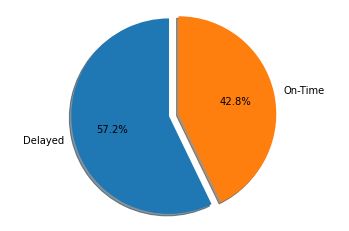

In [26]:
# Present the percentage as a pie chart
import matplotlib.pyplot as plt
%matplotlib inline

labels = 'Delayed', 'On-Time'
sizes = [southwest_delay_percentage, 1 - southwest_delay_percentage]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Southwest')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show();

What is the average delay? How does that compare to our competition?

In [31]:
# Calculate the average arrival_delay for each airline_name
airline_arrival_delays = flights.groupby('airline_name')['arrival_delay'].mean()
airline_arrival_delays

airline_name
AirTran Airways Corporation     44.146928
Alaska Airlines Inc.            37.594347
Aloha Airlines Inc.             21.085333
American Airlines Inc.          47.744316
Continental Air Lines Inc.      40.791774
Delta Air Lines Inc.            38.139690
Endeavor Air Inc.               50.443046
Envoy Air                       49.315837
ExpressJet Airlines Inc.        43.781863
ExpressJet Airlines Inc. (1)    49.502950
Frontier Airlines Inc.          26.323937
Hawaiian Airlines Inc.          32.245198
JetBlue Airways                 51.015374
Mesa Airlines Inc.              61.709455
Northwest Airlines Inc.         44.585155
PSA Airlines Inc.               46.515557
SkyWest Airlines Inc.           51.245069
Southwest Airlines Co.          31.172766
US Airways Inc.                 32.837107
United Air Lines Inc.           49.919762
Name: arrival_delay, dtype: float64

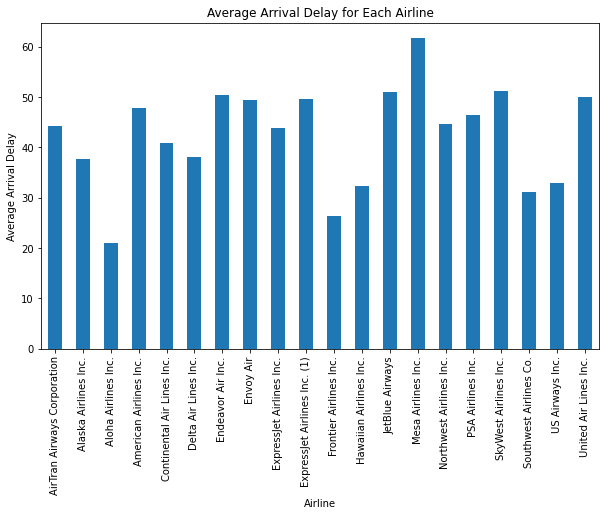

In [32]:
# Compare in Bar Chart
airline_arrival_delays.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Airline') # add to x-label to the plot
plt.ylabel('Average Arrival Delay') # add y-label to the plot
plt.title('Average Arrival Delay for Each Airline') # add title to the plot

plt.show();

In [34]:
# Calculate the average departure_delay for each airline_name
airline_departure_delays = flights.groupby('airline_name')['departure_delay'].mean()
airline_departure_delays

airline_name
AirTran Airways Corporation     42.096401
Alaska Airlines Inc.            40.184396
Aloha Airlines Inc.             26.680000
American Airlines Inc.          47.637400
Continental Air Lines Inc.      42.930965
Delta Air Lines Inc.            38.001586
Endeavor Air Inc.               50.594361
Envoy Air                       46.799949
ExpressJet Airlines Inc.        46.068158
ExpressJet Airlines Inc. (1)    49.673967
Frontier Airlines Inc.          26.170364
Hawaiian Airlines Inc.          33.693785
JetBlue Airways                 52.265839
Mesa Airlines Inc.              61.596987
Northwest Airlines Inc.         40.128254
PSA Airlines Inc.               45.073040
SkyWest Airlines Inc.           48.993667
Southwest Airlines Co.          35.139669
US Airways Inc.                 37.095114
United Air Lines Inc.           51.377346
Name: departure_delay, dtype: float64

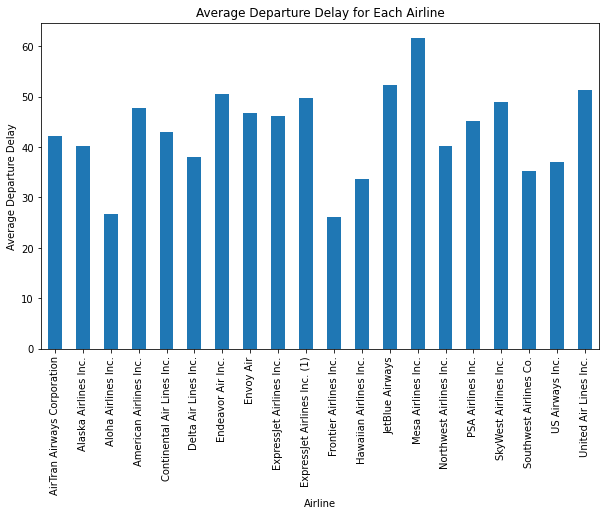

In [35]:
# Compare in Bar Chart
airline_departure_delays.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Airline') # add to x-label to the plot
plt.ylabel('Average Departure Delay') # add y-label to the plot
plt.title('Average Departure Delay for Each Airline') # add title to the plot

plt.show();

What % of delays were within our control? Is that consistent across the industry?

In [53]:
# Calculate the percentage of records with arrival_delay_caused_by_carrie > 0 for each airline_name, when arrival_delay > 15

# Generate a dummy variable for arrival_delay_caused_by_carrie
flights['arrival_delay_caused_by_carrier_dummy'] = np.where(flights['arrival_delay_caused_by_carrier'] > 0, 1, 0)

In [54]:
# Calculate the percentage of records with arrival_delay_caused_by_carrier_dummy = 1 for each airline_name, when arrival_delay > 15
airline_arrival_delays_caused_by_carrier = flights[flights['arrival_delay'] > 15].groupby('airline_name')['arrival_delay_caused_by_carrier_dummy'].mean()
airline_arrival_delays_caused_by_carrier

airline_name
AirTran Airways Corporation     0.911380
Alaska Airlines Inc.            0.907661
Aloha Airlines Inc.             0.950156
American Airlines Inc.          0.882914
Continental Air Lines Inc.      0.726215
Delta Air Lines Inc.            0.897268
Endeavor Air Inc.               0.918003
Envoy Air                       0.915078
ExpressJet Airlines Inc.        0.801712
ExpressJet Airlines Inc. (1)    0.820459
Frontier Airlines Inc.          0.974661
Hawaiian Airlines Inc.          1.000000
JetBlue Airways                 0.903813
Mesa Airlines Inc.              0.823415
Northwest Airlines Inc.         0.909147
PSA Airlines Inc.               0.624631
SkyWest Airlines Inc.           0.797142
Southwest Airlines Co.          0.963571
US Airways Inc.                 0.901585
United Air Lines Inc.           0.887757
Name: arrival_delay_caused_by_carrier_dummy, dtype: float64

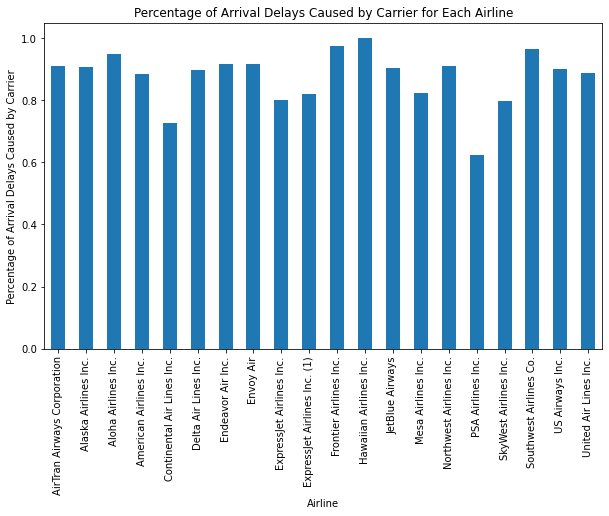

In [55]:
# Compare in Bar Chart
airline_arrival_delays_caused_by_carrier.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Airline') # add to x-label to the plot
plt.ylabel('Percentage of Arrival Delays Caused by Carrier') # add y-label to the plot
plt.title('Percentage of Arrival Delays Caused by Carrier for Each Airline') # add title to the plot

plt.show();